# Trabalho final de estatística para Ciência de Dados

## Enunciado

Objetivos: Aplicar os conhecimentos em estatística.
Dada uma matriz n x n esférica:
Esférica: o indivíduo, digamos na borda direita pode ainda se deslocar para a direita,
surgindo na borda esquerda da matriz. O mesmo acontece para as outras bordas;
1. Alimentá-la inicialmente com os seguintes indivíduos:

  1.1. Um infectado, cuja posição é aleatória;
  
  1.2. Um número randômico de assintomáticos, cujas posições são aleatórias;
  
  1.3. Um número randômico de sintomáticos, cujas posições são aleatórias;

2. A forma de desenvolvimento:
  
  2.1. A rede evolui em passos, cada passo significa a mudança de todos os indivíduos
  infectados de posição. Antes disso, ele realiza todas as tarefas de infecção sobre os
  outros indivíduos;
3. A mobilidade;

  3.1. Somente os indivíduos infectados caminham ou mudam de posição no passo. Os
outros indivíduos permanecem estáticos;

  3.2. Apenas indivíduos infectados circulam na rede
4. O indivíduo infectado deverá infectar os seus vizinhos diretos (não diagonais) em dois
casos, desenvolvidos separadamente:

  4.1. Apenas com 30% de chance;

  4.2. Com 100% de chance;
5. A infecção:

  5.1. O infectado adquiri a propriedade de infectar;
  
  5.2. O infectante infecta os seus vizinhos, considerando as regras do item 4;
    
    5.2.1. O indivíduo assintomático apresenta uma infecção do tipo 1;
    
    5.2.2. Os indivíduos sintomáticos apresentam uma infecção tipo 2:
    
    5.2.3. O programa deve escolher quem é sintomático com chance de 20%.
6. A cura:

  6.1. A cura dos infectados ocorre após 10 atualizações;
7. A morte:

  7.1. A morte pode ocorrer para os indivíduos do tipo 2, do início da infecção até a 10 atualização com 2% de chance;
8. Para cada um dos casos do item 4, verifique com quantos passos sua rede atinge 100%
de infectados e com 50% deste valor colha os seguintes dados:

  8.1. Número de assintomáticos;
  
  8.2. Número de sintomáticos;
  
  8.3. Número de curados;
  
  8.4. Número de mortos;
9. Os valores gerados no item 8, para cada caso do item 4, devem analisados
estatisticamente e:

  9.1. Realize a estatística descritiva;

  9.2. Verificar se o experimento se ajusta a uma distribuição normal.

  9.3. Verifique com quantos passos sua rede atinge 100% de infectados:

    9.3.1. Com base nestes dados, verifique com 95% de confiança, qual o número de cada indivíduo no passo n/2+1;
    
    9.3.2. Verifique a independência das contaminações entre assintomáticos e
    sintomáticos através de CHI-Square, com base na seguinte relação: são
    esperados 18% de doentes e 80% de assintomáticos e 2% de mortos;

## Import do código desenvolvido

In [ ]:
%cd /content
%rm -rf Trabalho_final_estatistica_cd
!git clone https://github.com/eduardodut/Trabalho_final_estatistica_cd.git
%cd Trabalho_final_estatistica_cd/src
from Simulador import Simulador
import pandas as pd
dados_simulacoes_100 = pd.read_csv('/content/Trabalho_final_estatistica_cd/dados/simulacoes_chance_100%.txt', sep=' ')
dados_simulacoes_30 = pd.read_csv('/content/Trabalho_final_estatistica_cd/dados/simulacoes_chance_30%.txt', sep=' ')

/content
Cloning into 'Trabalho_final_estatistica_cd'...
remote: Enumerating objects: 1196, done.
remote: Counting objects: 100% (1196/1196), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 1196 (delta 1088), reused 1087 (delta 979), pack-reused 0
Receiving objects: 100% (1196/1196), 2.73 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (1088/1088), done.
/content/Trabalho_final_estatistica_cd/src


## Exemplo de uma simulação

In [ ]:

#@title Gerar simulações
#@markdown ### Selecione os parâmetros da simulação e execute a célula
#@markdown ### O resultados podem ser acessados no dataframe sim.dataframe



tamanho_matriz = 73 #@param {type:"slider", min:10, max:600, step:1}
chance_infeccao = 0.3 #@param {type:"slider", min:0, max:1, step:0.01}
chance_sintomatico = 0.2 #@param {type:"slider", min:0, max:1, step:0.01}

chance_morte = 0.02 #@param {type:"slider", min:0, max:1, step:0.01}
atualizacoes_cura = 10 #@param {type:"slider", min:0, max:100, step:1}
inserir_infectados_aleatorios = False #@param {type:"boolean"}

import random                                         
import pandas as pd

random.seed(random.randint(1,100))
sim = Simulador(
    tamanho_matriz,
    chance_infeccao,
    chance_sintomatico,
    chance_morte,
    atualizacoes_cura,
    inserir_infectados_aleatorios)

pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000
sim.executar_simulacao()   
print(sim.dataframe)
pd.DataFrame(sim.dict_resumo, index=[0]).head()


    num_sadios  num_infect_t1  num_infect_t2  num_curados  num_mortos
0         5328              1              0            0           0
1         5328              1              0            0           0
2         5328              1              0            0           0
3         5326              3              0            0           0
4         5325              4              0            0           0
5         5321              8              0            0           0
6         5315             13              1            0           0
7         5307             19              2            0           1
8         5301             25              2            0           1
9         5295             30              3            0           1
10        5284             37              6            1           1
11        5269             51              7            1           1
12        5254             63             10            1           1
13        5232      

,pop_inicial,tipo1_inicial,tipo2_inicial,n/2_100%_infectados,tipo1_n/2_100%_infectados,tipo2_n/2_100%_infectados,curados_n/2_100%_infectados,mortos_n/2_100%_infectados,n/2+1_100%_infectados,tipo1_n/2+1_100%_infectados,tipo2_n/2+1_100%_infectados,curados_n/2+1_100%_infectados,mortos_n/2+1_100%_infectados,n_100%_infectados,tipo1_n_100%_infectados,tipo2_n_100%_infectados,curados_n_100%_infectados,mortos_n_100%_infectados,n/2_pico,tipo1_n/2_pico,tipo2_n/2_pico,curados_n/2_pico,mortos_n/2_pico,n/2+1_pico,tipo1_n/2+1_pico,tipo2_n/2+1_pico,curados_n/2+1_pico,mortos_n/2+1_pico,n_pico,tipo1_n_pico,tipo2_n_pico,curados_n_pico,mortos_n_pico,n_total,sadios_n_total,curados_n_total,mortos_n_total
0,5329,1,0,43,634,178,962,68,44,642,182,1030,73,86,150,39,4892,248,32,426,133,342,30,33,463,133,379,35,64,971,303,2850,167,96,0,5078,251


### Campos dos resultados da simulação

São registrados os dados dos seguintes momentos:
*   Momento de máxima infecção;
*   Momento onde o número de sadios para de diminuir;
*   Resultado após a última atualização da simulação;


In [ ]:
#NÃO EXECUTAR!!

"pop_inicial": Número inicial de indivíduos na matriz  
"tipo1_inicial": Número inicial de infectados assintomáticos no momento inicial da matriz (Tipo 1). Padrão = 1
"tipo2_inicial": Número inicial de infectados sintomáticos no momento inicial da matriz (Tipo 2). Padrão = 0

"n/2_100%_infectados": Metade do número de passos necessários para não haver mais indivíduos sadios na matriz
    "tipo1_n/2_100%_infectados": Número de infectados assintomáticos no passo n/2
    "tipo2_n/2_100%_infectados": Número de sintomáticos no passo n/2
    "curados_n/2_100%_infectados": Número de curados no passo n/2
    "mortos_n/2_100%_infectados": Número de mortos do passo n/2

"n/2+1_100%_infectados": Passo seguinte ao anterior
    "tipo1_n/2+1_100%_infectados".
    "tipo2_n/2+1_100%_infectados.
    "curados_n/2+1_100%_infectados".
    "mortos_n/2+1_100%_infectados".

"n_100%_infectados": Número de passos onde o número de indivíduos sadios atinge o valor mínimo da simulação
    "tipo1_n_100%_infectados".
    "tipo2_n_100%_infectados".
    "curados_n_100%_infectados".
    "mortos_n_100%_infectados".

"n/2_pico": Metade do número de passos necessários para atingir o pico de infectados da simulação
    "tipo1_n/2_pico".
    "tipo2_n/2_pico".
    "curados_n/2_pico".
    "mortos_n/2_pico".

"n/2+1_pico": Passo seguinte ao anterior
    "tipo1_n/2+1_pico".
    "tipo2_n/2+1_pico".
    "curados_n/2+1_pico".
    "mortos_n/2+1_pico".

"n_pico": Número de atualizações necessárias para atingir o pico de infecção da simulação
    "tipo1_n_pico".
    "tipo2_n_pico".
    "curados_n_pico".
    "mortos_n_pico".

"n_total": Número de atualizações para o fim da doença na matriz
    "sadios_n_total".
    "curados_n_total".
    "mortos_n_total".

### Gráficos da evolução da infecção

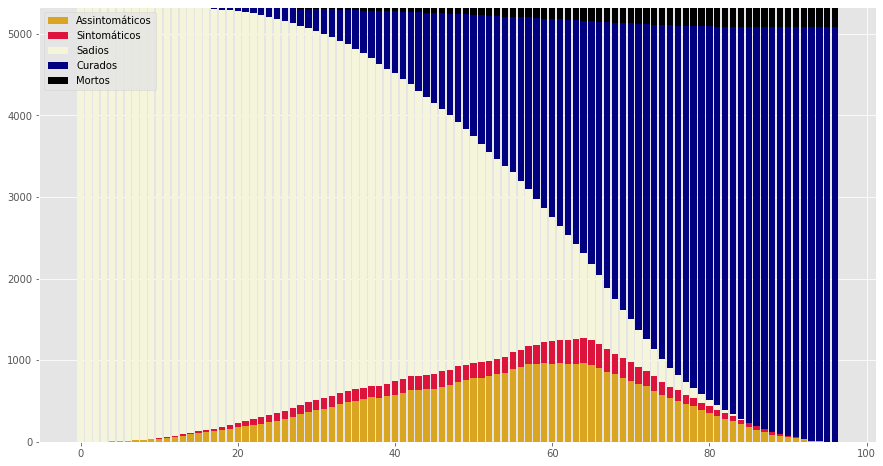

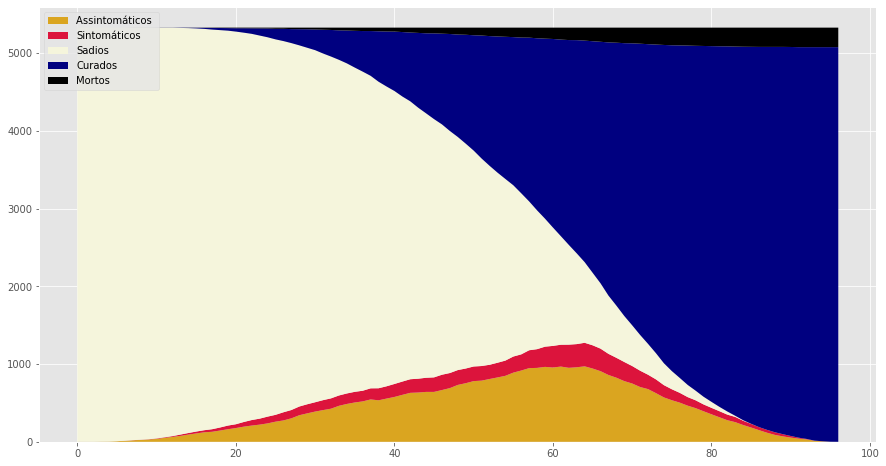

In [ ]:
#@markdown Gráfico de barras e de área.
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots()
colors = ["goldenrod", "crimson", "beige", "navy", "black"]
ax.bar(sim.dataframe.index, sim.dataframe.num_infect_t1, label = "Assintomáticos", color=colors[0])
ax.bar(sim.dataframe.index, sim.dataframe.num_infect_t2, bottom = sim.dataframe.num_infect_t1, label = "Sintomáticos", color=colors[1])
ax.bar(sim.dataframe.index, sim.dataframe.num_sadios, bottom = sim.dataframe.num_infect_t1 + sim.dataframe.num_infect_t2, label = "Sadios", color=colors[2])
ax.bar(sim.dataframe.index, sim.dataframe.num_curados, bottom = sim.dataframe.num_infect_t1 + sim.dataframe.num_infect_t2 + sim.dataframe.num_sadios, label="Curados", color = colors[3])
ax.bar(sim.dataframe.index, sim.dataframe.num_mortos, bottom = sim.dataframe.num_curados + sim.dataframe.num_infect_t1 + sim.dataframe.num_infect_t2 + sim.dataframe.num_sadios, label="Mortos", color = colors[4])

ax.legend()
fig.set_size_inches(15,8)
plt.show()


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x = sim.dataframe.index
tipo1 = sim.dataframe.num_infect_t1.values
tipo2 = sim.dataframe.num_infect_t2.values
sadios = sim.dataframe.num_sadios.values
curados = sim.dataframe.num_curados.values
mortos = sim.dataframe.num_mortos.values

y = np.vstack([tipo1, tipo2, sadios, curados, mortos])

labels = ["Assintomáticos ", "Sintomáticos", "Sadios", "Curados", "Mortos"]

fig, ax = plt.subplots()
ax.stackplot(x, tipo1, tipo2, sadios,curados, mortos, labels=labels, colors= colors)
ax.legend(loc='upper left')
fig.set_size_inches(15,8)
plt.show()

### Evolução da matriz

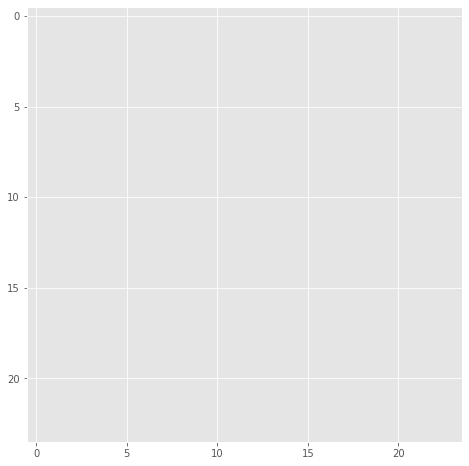

In [ ]:
#@markdown
!pip install celluloid
from matplotlib import pyplot as plt
from celluloid import Camera
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap
from IPython.display import HTML
colors = ["beige", "goldenrod", "crimson", "navy", "black"]
cmap = ListedColormap(colors)

fig = plt.figure()
#ax = plt.axis()
fig.set_size_inches(8,8)
camera = Camera(fig)
for matriz_status in sim.lista_matrizes_status:
    labels = ["Assintomáticos ", "Sintomáticos", "Sadios", "Curados", "Mortos"]
    #ax.legend(loc='upper left')
    im = plt.imshow(matriz_status, cmap = cmap, vmin= 0, vmax = 4)
    #plt.legend(labels, borderaxespad=0. )
    #plt.axes.set_
    camera.snap()
animation = camera.animate()
#animation.save('celluloid_minimal.gif', writer = 'imagemagick')
# rc('animation', html='jshtml')
HTML(animation.to_html5_video())
# animation


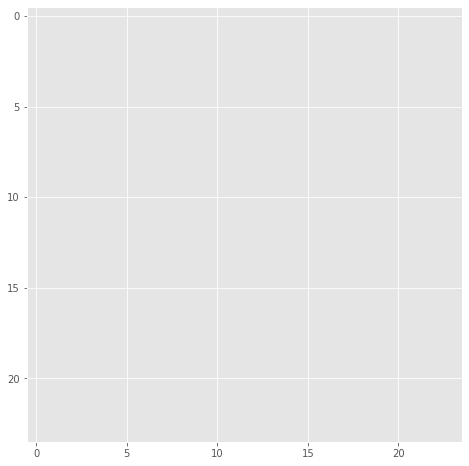

In [ ]:
#@markdown
#!pip install celluloid
from matplotlib import pyplot as plt
from celluloid import Camera
from matplotlib import animation, rc
from matplotlib.colors import ListedColormap
from IPython.display import HTML
colors = ["beige", "goldenrod", "crimson", "navy", "black"]
cmap = ListedColormap(colors)

fig = plt.figure()
#ax = plt.axis()
fig.set_size_inches(8,8)
camera = Camera(fig)
for matriz_status in sim.lista_matrizes_status:
    labels = ["Assintomáticos ", "Sintomáticos", "Sadios", "Curados", "Mortos"]
    #ax.legend(loc='upper left')
    im = plt.imshow(matriz_status, cmap = cmap, vmin= 0, vmax = 4, interpolation= "spline16")
    #plt.legend(labels, borderaxespad=0. )
    #plt.axes.set_
    camera.snap()
animation = camera.animate()
#animation.save('celluloid_minimal.gif', writer = 'imagemagick')
# rc('animation', html='jshtml')
HTML(animation.to_html5_video())
# animation


## Conjunto de simulações

In [ ]:
#@title Gerar simulações
#@markdown ### Selecione os parâmetros das simulações e execute a célula
#@markdown ### O resultados podem ser acessados no dataframe "dados_simulacoes"

nome_simulacao = "simulacoes_100%" #@param {type:"string"}
salvar_simulacoes = False #@param {type:"boolean"}
n_simulacoes = 70 #@param {type:"slider", min:10, max:200, step:1}
tamanho_matriz = 40 #@param {type:"slider", min:10, max:200, step:1}
chance_infeccao = 0.3 #@param {type:"slider", min:0, max:1, step:0.1}
chance_sintomatico = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}

chance_morte = 0.02 #@param {type:"slider", min:0, max:1, step:0.01}
atualizacoes_cura = 10 #@param {type:"slider", min:0, max:100, step:1}
inserir_infectados_aleatorios = False #@param {type:"boolean"}
import numpy as np
import random                                         
import pandas as pd
dados_simulacoes = pd.DataFrame(dtype=np.int)
for i in range(n_simulacoes):
  

  sim = Simulador(
      tamanho_matriz,
      chance_infeccao,
      chance_sintomatico,
      chance_morte,
      atualizacoes_cura,      
      inserir_infectados_aleatorios)


  sim.executar_simulacao()   
  
  dados_simulacoes = dados_simulacoes.append(sim.dict_resumo, ignore_index = True)

dados_simulacoes = dados_simulacoes[["pop_inicial", 
                                     "tipo1_inicial",
                                     "tipo2_inicial", 

                                     "n/2_100%_infectados",
                                     "tipo1_n/2_100%_infectados",
                                     "tipo2_n/2_100%_infectados",
                                     "curados_n/2_100%_infectados",
                                     "mortos_n/2_100%_infectados",

                                     "n/2+1_100%_infectados",
                                     "tipo1_n/2+1_100%_infectados",
                                     "tipo2_n/2+1_100%_infectados",
                                     "curados_n/2+1_100%_infectados",
                                     "mortos_n/2+1_100%_infectados",

                                     "n_100%_infectados",
                                     "tipo1_n_100%_infectados",
                                     "tipo2_n_100%_infectados",
                                     "curados_n_100%_infectados",
                                     "mortos_n_100%_infectados",
                                     
                                     "n/2_pico",
                                     "tipo1_n/2_pico",
                                     "tipo2_n/2_pico",
                                     "curados_n/2_pico",
                                     "mortos_n/2_pico",
                                    
                                     "n/2+1_pico",
                                     "tipo1_n/2+1_pico",
                                     "tipo2_n/2+1_pico",
                                     "curados_n/2+1_pico",
                                     "mortos_n/2+1_pico",

                                     "n_pico",
                                     "tipo1_n_pico",
                                     "tipo2_n_pico",
                                     "curados_n_pico",
                                     "mortos_n_pico",
                                     
                                     "n_total",
                                     "sadios_n_total",
                                     "curados_n_total",
                                     "mortos_n_total"]].astype(int)






if salvar_simulacoes == True:
  
  dados_simulacoes.to_csv('/content/Trabalho_final_estatistica_cd/dados/'+ nome_simulacao + '.txt', sep=' ', index=False)
  
dados_simulacoes.head()


colunas_100infectados = ['n/2_100%_infectados',	'tipo1_n/2_100%_infectados',	'tipo2_n/2_100%_infectados',	'curados_n/2_100%_infectados','mortos_n/2_100%_infectados']
colunas_pico = ['n/2_pico',	'tipo1_n/2_pico',	'tipo2_n/2_pico',	'curados_n/2_pico','mortos_n/2_pico']
dados_simulacoes.head()

,pop_inicial,tipo1_inicial,tipo2_inicial,n/2_100%_infectados,tipo1_n/2_100%_infectados,tipo2_n/2_100%_infectados,curados_n/2_100%_infectados,mortos_n/2_100%_infectados,n/2+1_100%_infectados,tipo1_n/2+1_100%_infectados,tipo2_n/2+1_100%_infectados,curados_n/2+1_100%_infectados,mortos_n/2+1_100%_infectados,n_100%_infectados,tipo1_n_100%_infectados,tipo2_n_100%_infectados,curados_n_100%_infectados,mortos_n_100%_infectados,n/2_pico,tipo1_n/2_pico,tipo2_n/2_pico,curados_n/2_pico,mortos_n/2_pico,n/2+1_pico,tipo1_n/2+1_pico,tipo2_n/2+1_pico,curados_n/2+1_pico,mortos_n/2+1_pico,n_pico,tipo1_n_pico,tipo2_n_pico,curados_n_pico,mortos_n_pico,n_total,sadios_n_total,curados_n_total,mortos_n_total
0,1600,1,0,24,302,86,181,15,25,326,89,202,16,49,100,30,1410,60,17,167,58,48,8,18,186,62,58,9,34,511,144,558,39,59,0,1540,60
1,1600,1,0,22,299,74,120,7,23,310,80,146,7,45,212,72,1256,59,17,210,40,34,3,18,226,47,48,4,34,501,139,584,31,55,1,1534,65
2,1600,1,0,23,318,101,176,8,24,344,108,201,11,47,96,32,1402,70,17,192,56,50,5,18,212,63,62,6,34,502,152,635,47,57,0,1524,76
3,1600,1,0,23,276,80,147,9,24,303,81,169,10,47,144,51,1346,59,17,177,43,39,4,18,192,49,52,4,34,522,149,543,30,57,0,1536,64
4,1600,1,0,24,329,95,189,18,25,341,102,225,20,48,106,38,1388,68,17,204,55,43,7,18,225,60,55,9,34,496,131,603,37,58,0,1531,69


## Testes estatísticos


### 8. Dados obtidos com 50% dos passos para 100% de infecção

Extra: Foram também obtidos os dados para o pico da infecção.

Entende-se que 100% de infecção ocorre quando não há mais sadios a serem infectados, ou o número de sadios chega ao valor mínimo da simulação.

O pico de infeção ocorre quando a soma de sintomáticos e assintomáticos atinge o máximo ocorrido na simulação.

Dependendo do tamanho da matriz, esses dois momentos significativos da simulação podem não coincidir.

#### 100% de infecção

In [ ]:
dados_simulacoes_30[['n/2_100%_infectados',	'tipo1_n/2_100%_infectados',	'tipo2_n/2_100%_infectados',	'curados_n/2_100%_infectados','mortos_n/2_100%_infectados']].head()

,n/2_100%_infectados,tipo1_n/2_100%_infectados,tipo2_n/2_100%_infectados,curados_n/2_100%_infectados,mortos_n/2_100%_infectados
0,24,322,74,210,12
1,23,291,72,145,14
2,24,312,90,164,14
3,23,345,89,181,17
4,25,299,101,165,20


In [ ]:
dados_simulacoes_100[['n/2_100%_infectados',	'tipo1_n/2_100%_infectados',	'tipo2_n/2_100%_infectados',	'curados_n/2_100%_infectados','mortos_n/2_100%_infectados']].head()

,n/2_100%_infectados,tipo1_n/2_100%_infectados,tipo2_n/2_100%_infectados,curados_n/2_100%_infectados,mortos_n/2_100%_infectados
0,20,406,196,207,30
1,20,420,186,209,24
2,20,384,217,203,35
3,20,376,222,208,33
4,20,417,185,209,28


In [ ]:
dados_simulacoes[['n/2_100%_infectados',	'tipo1_n/2_100%_infectados',	'tipo2_n/2_100%_infectados',	'curados_n/2_100%_infectados','mortos_n/2_100%_infectados']].head()

,n/2_100%_infectados,tipo1_n/2_100%_infectados,tipo2_n/2_100%_infectados,curados_n/2_100%_infectados,mortos_n/2_100%_infectados
0,24,302,86,181,15
1,22,299,74,120,7
2,23,318,101,176,8
3,23,276,80,147,9
4,24,329,95,189,18


#### Pico de infecção

In [ ]:
dados_simulacoes_30[['n/2_pico',	'tipo1_n/2_pico',	'tipo2_n/2_pico',	'curados_n/2_pico','mortos_n/2_pico']].head()

,n/2_pico,tipo1_n/2_pico,tipo2_n/2_pico,curados_n/2_pico,mortos_n/2_pico
0,17,213,69,45,4
1,17,188,46,42,8
2,17,181,52,30,5
3,16,209,54,29,7
4,17,170,32,23,9


In [ ]:
dados_simulacoes_100[['n/2_pico',	'tipo1_n/2_pico',	'tipo2_n/2_pico',	'curados_n/2_pico','mortos_n/2_pico']].head()

,n/2_pico,tipo1_n/2_pico,tipo2_n/2_pico,curados_n/2_pico,mortos_n/2_pico
0,12,177,114,12,10
1,12,203,91,12,7
2,12,199,92,11,11
3,12,194,104,12,3
4,12,195,98,13,7


In [ ]:
dados_simulacoes[['n/2_pico',	'tipo1_n/2_pico',	'tipo2_n/2_pico',	'curados_n/2_pico','mortos_n/2_pico']].head()

,n/2_pico,tipo1_n/2_pico,tipo2_n/2_pico,curados_n/2_pico,mortos_n/2_pico
0,17,167,58,48,8
1,17,210,40,34,3
2,17,192,56,50,5
3,17,177,43,39,4
4,17,204,55,43,7


### 9. Os valores gerados no item 8, para cada caso do item 4, devem ser analisados estatisticamente e:


#### 9.1 Realize a estatística descritiva


In [ ]:
#@title parâmetros dos histogramas
n_bins = 17 #@param {type:"slider", min:0, max:100, step:1}
tamanho_x = 15 #@param {type:"slider", min:0, max:20, step:1}
tamanho_y = 10 #@param {type:"slider", min:0, max:20, step:1}
tamanho_figura = (tamanho_x, tamanho_y)
#@subtitle 
from matplotlib import pyplot
colunas_100infectados = ['n/2_100%_infectados',	'tipo1_n/2_100%_infectados',	'tipo2_n/2_100%_infectados',	'curados_n/2_100%_infectados','mortos_n/2_100%_infectados']
colunas_pico = ['n/2_pico',	'tipo1_n/2_pico',	'tipo2_n/2_pico',	'curados_n/2_pico','mortos_n/2_pico']

##### **100% de infectados na matriz**

###### Chance de infecção de 30%

In [ ]:
dados_simulacoes_30[colunas_100infectados].describe()

,n/2_100%_infectados,tipo1_n/2_100%_infectados,tipo2_n/2_100%_infectados,curados_n/2_100%_infectados,mortos_n/2_100%_infectados
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,24.090000,323.150000,89.850000,182.880000,15.080000
std,1.073981,23.812981,10.334189,32.775108,4.505171
min,22.000000,252.000000,65.000000,128.000000,6.000000
25%,23.000000,309.000000,83.000000,162.000000,12.000000
50%,24.000000,322.000000,89.500000,177.000000,14.500000
75%,25.000000,337.000000,98.000000,195.000000,17.000000
max,29.000000,395.000000,120.000000,297.000000,29.000000


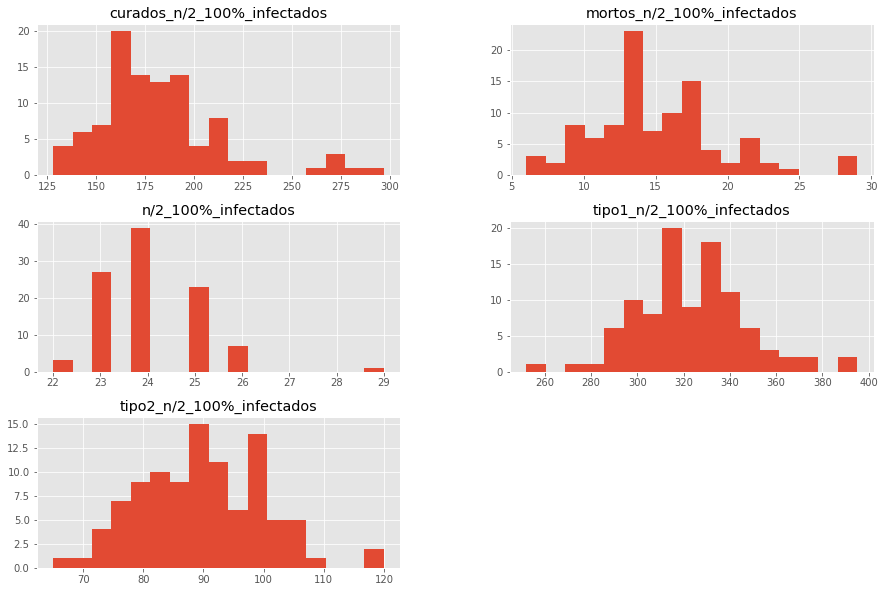

In [ ]:
_ = dados_simulacoes_30[colunas_100infectados].hist(bins=n_bins, figsize=tamanho_figura) # Histograms

###### **Chance de infecção de 100%**

In [ ]:
dados_simulacoes_100[colunas_100infectados].describe()

,n/2_100%_infectados,tipo1_n/2_100%_infectados,tipo2_n/2_100%_infectados,curados_n/2_100%_infectados,mortos_n/2_100%_infectados
count,100.0,100.000000,100.000000,100.000000,100.000000
mean,20.0,401.380000,200.880000,207.990000,28.750000
std,0.0,12.837587,12.814354,3.261328,4.441255
min,20.0,374.000000,170.000000,200.000000,14.000000
25%,20.0,390.750000,192.000000,206.000000,26.000000
50%,20.0,402.500000,200.000000,208.000000,29.000000
75%,20.0,410.000000,211.250000,210.000000,31.000000
max,20.0,430.000000,228.000000,216.000000,39.000000


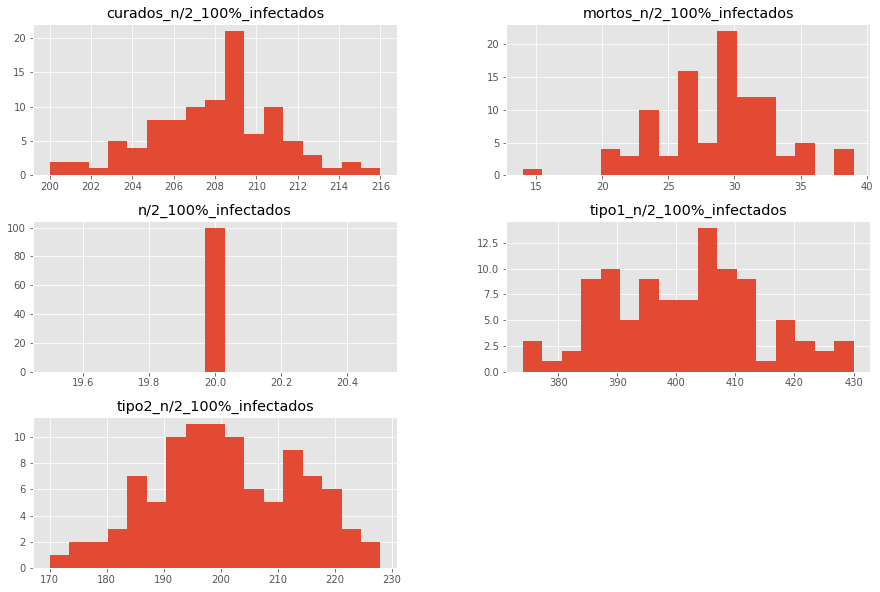

In [ ]:
_ = dados_simulacoes_100[colunas_100infectados].hist(bins=n_bins, figsize=tamanho_figura) # Histograms

###### "dados_simulacoes"

In [ ]:
dados_simulacoes[colunas_100infectados].describe()

,n/2_100%_infectados,tipo1_n/2_100%_infectados,tipo2_n/2_100%_infectados,curados_n/2_100%_infectados,mortos_n/2_100%_infectados
count,70.00000,70.000000,70.000000,70.000000,70.000000
mean,23.90000,316.928571,89.042857,173.514286,14.657143
std,0.98024,22.670495,9.458430,28.360384,4.507275
min,22.00000,264.000000,70.000000,120.000000,5.000000
25%,23.00000,300.250000,82.000000,159.000000,11.000000
50%,24.00000,320.500000,88.000000,173.000000,15.000000
75%,24.00000,333.750000,96.750000,187.000000,17.000000
max,27.00000,368.000000,110.000000,262.000000,28.000000


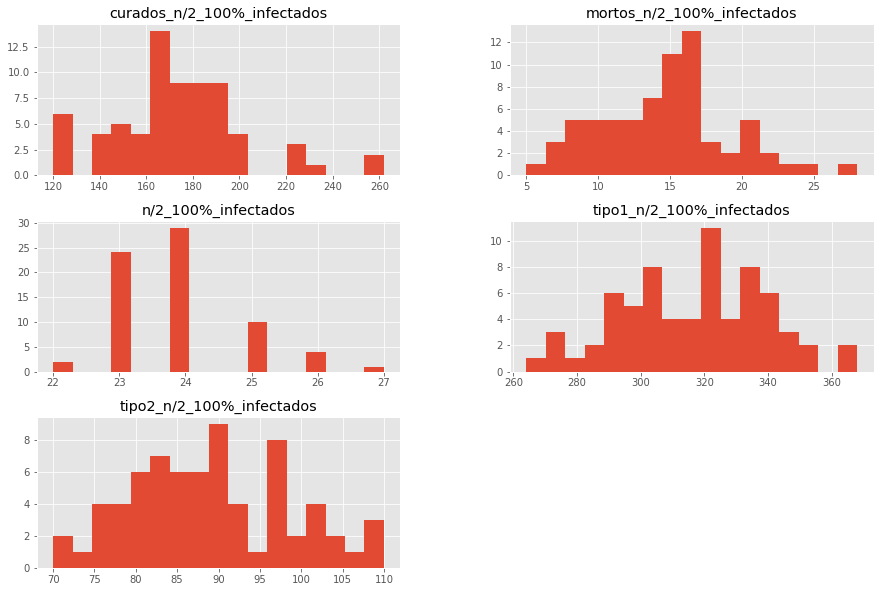

In [ ]:
_ = dados_simulacoes[colunas_100infectados].hist(bins=n_bins, figsize=tamanho_figura) # Histograms

##### **Pico de infecção**

###### Chance de infecção de 30%

In [ ]:
dados_simulacoes_30[colunas_pico].describe()

,n/2_pico,tipo1_n/2_pico,tipo2_n/2_pico,curados_n/2_pico,mortos_n/2_pico
count,100.000000,100.00000,100.00000,100.000000,100.000000
mean,17.000000,188.42000,52.71000,39.120000,5.390000
std,0.791368,16.27676,7.54956,9.510526,2.330713
min,15.000000,145.00000,32.00000,16.000000,0.000000
25%,16.750000,177.00000,48.00000,33.000000,4.000000
50%,17.000000,190.00000,52.00000,39.000000,5.000000
75%,17.250000,199.00000,58.00000,44.000000,7.000000
max,19.000000,221.00000,70.00000,65.000000,13.000000


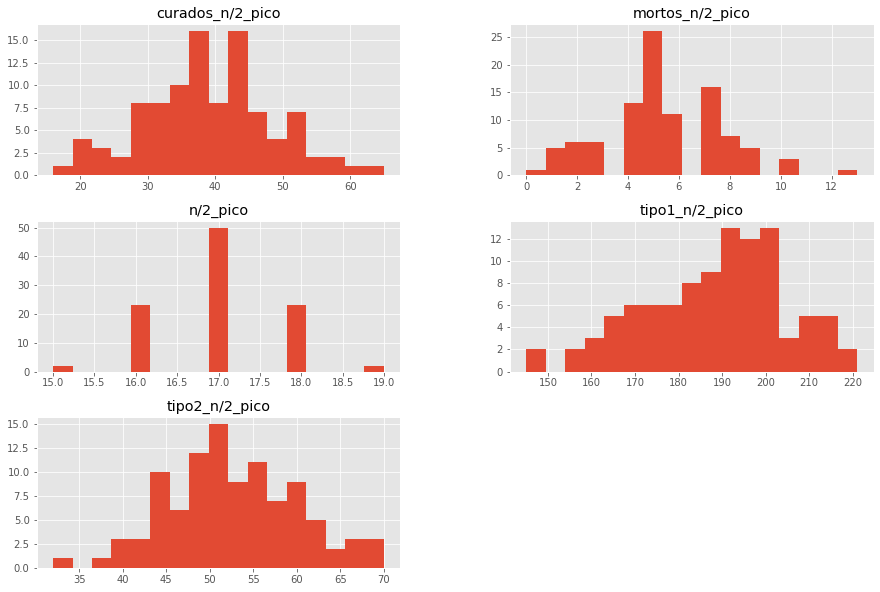

In [ ]:
_ = dados_simulacoes_30[colunas_pico].hist(bins=n_bins, figsize=tamanho_figura) # Histograms

###### Chance de infecção de 100%

In [ ]:
dados_simulacoes_100[colunas_pico].describe()

,n/2_pico,tipo1_n/2_pico,tipo2_n/2_pico,curados_n/2_pico,mortos_n/2_pico
count,100.0,100.000000,100.000000,100.000000,100.000000
mean,12.0,199.250000,94.260000,12.430000,7.060000
std,0.0,8.580428,8.529947,0.685418,2.407144
min,12.0,176.000000,74.000000,11.000000,1.000000
25%,12.0,194.000000,89.000000,12.000000,6.000000
50%,12.0,199.000000,95.000000,13.000000,7.000000
75%,12.0,206.000000,100.000000,13.000000,9.000000
max,12.0,219.000000,119.000000,13.000000,13.000000


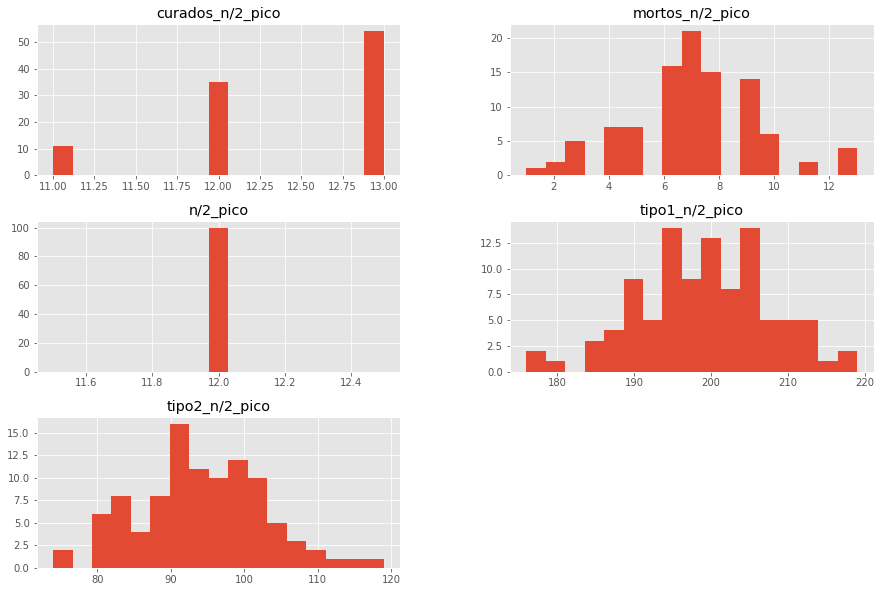

In [ ]:
_ = dados_simulacoes_100[colunas_pico].hist(bins=n_bins, figsize=tamanho_figura) # Histograms

###### "dados_simulacoes"

In [ ]:
dados_simulacoes[colunas_pico].describe()

,n/2_pico,tipo1_n/2_pico,tipo2_n/2_pico,curados_n/2_pico,mortos_n/2_pico
count,70.000000,70.000000,70.000000,70.000000,70.000000
mean,17.042857,187.628571,51.757143,39.057143,5.600000
std,0.710903,19.840795,8.063940,9.732488,2.385949
min,16.000000,148.000000,31.000000,14.000000,1.000000
25%,17.000000,174.000000,46.000000,33.250000,4.000000
50%,17.000000,189.000000,51.500000,39.000000,5.000000
75%,17.000000,202.000000,58.750000,45.000000,7.000000
max,20.000000,238.000000,69.000000,66.000000,12.000000


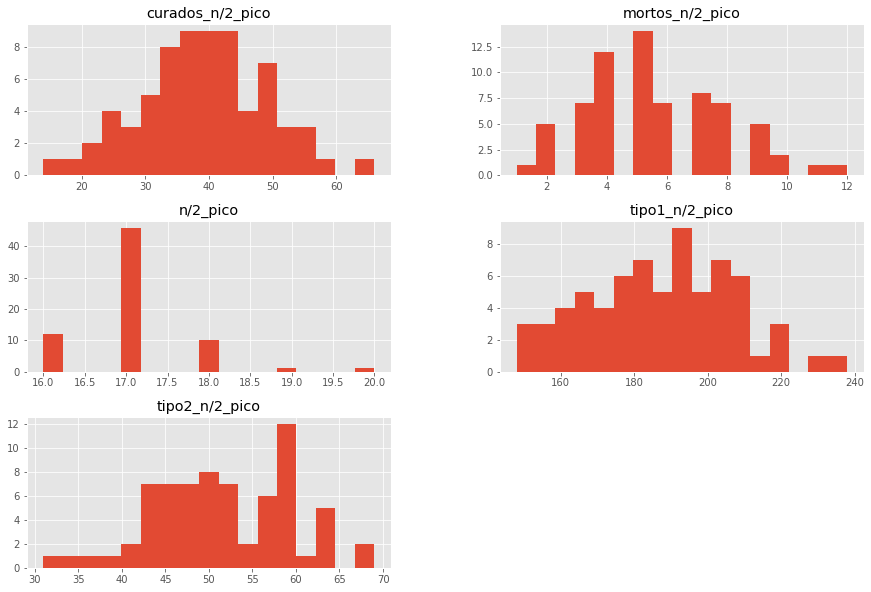

In [ ]:
_ = dados_simulacoes[colunas_pico].hist(bins=n_bins, figsize=tamanho_figura) # Histograms


#### 9.2 Verificar se o experimento se ajusta a uma distribuição normal


##### QQplots

Em estatística, um gráfico Q-Q[1] ("Q" significa quantil) é um gráfico de probabilidades, que é um método gráfico para comparar duas distribuições de probabilidade, traçando seus quantis uns contra os outros. Primeiro, o conjunto de intervalos para os quantis é escolhido. Um ponto (x, y) no gráfico corresponde a um dos quantis da segunda distribuição (coordenada y) plotadas contra o mesmo mesmo quantil da primeira distribuição de (coordenada x). Portanto, a linha é uma curva paramétrica com o parâmetro que é o (número do) intervalo para quantil.

Se as duas distribuições que estão sendo comparadas são semelhantes, os pontos no gráfico Q-Q vão repousar na linha y = x, aproximadamente. Se as distribuições são linearmente relacionadas, os pontos no gráfico Q-Q irão repousar em uma linha, aproximadamente, mas não necessariamente na linha y = x. gráficos Q-Q também podem ser usados como meio gráfico de estimativa de parâmetros de dispersão e tendência central em uma família de distribuições.

In [ ]:
#@title ##### Função para os QQ plots 


from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from pylab import plot, show, legend, title, xlabel, ylabel
colunas_100infectados = ['n/2_100%_infectados',	'tipo1_n/2_100%_infectados',	'tipo2_n/2_100%_infectados',	'curados_n/2_100%_infectados','mortos_n/2_100%_infectados']
colunas_pico = ['n/2_pico',	'tipo1_n/2_pico',	'tipo2_n/2_pico',	'curados_n/2_pico','mortos_n/2_pico']

def qq_plot(dataframe,colunas):
  for coluna in dataframe[colunas].columns:
    qqplot(dados_simulacoes_30[coluna], line='s')
    title(coluna)
    pyplot.show()





###### Chance de infecção de 30%


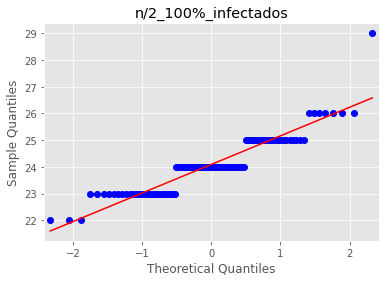

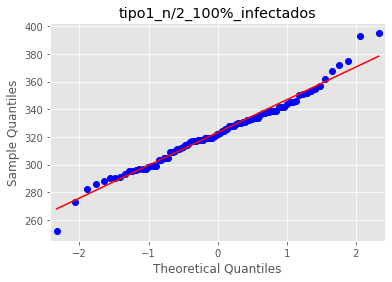

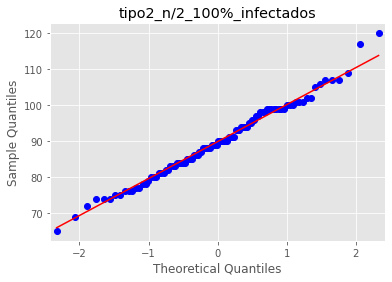

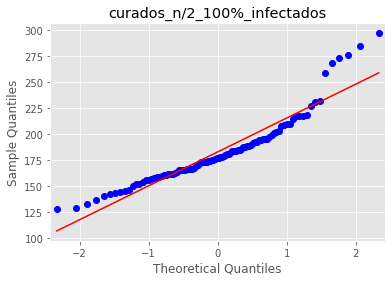

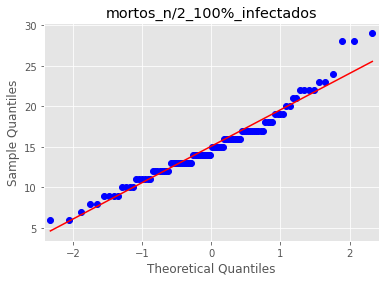

In [ ]:
#n/2 100% infectados
qq_plot(dados_simulacoes_30,colunas_100infectados)

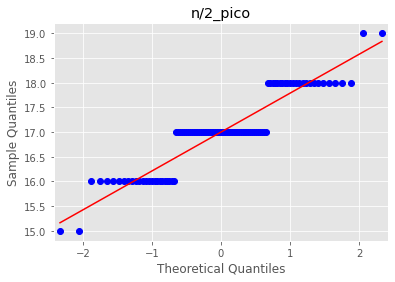

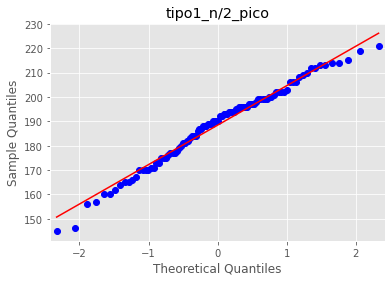

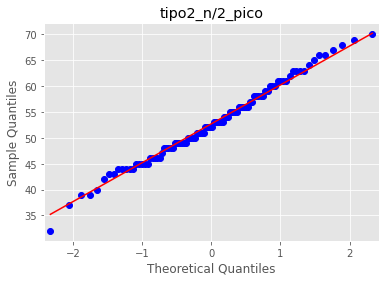

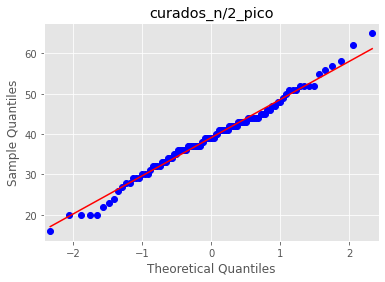

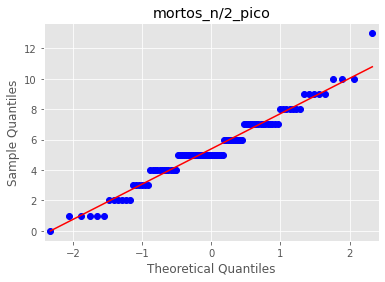

In [ ]:
#n/2 pico de infecção
qq_plot(dados_simulacoes_30,colunas_pico)

###### Chance de infecção de 100%


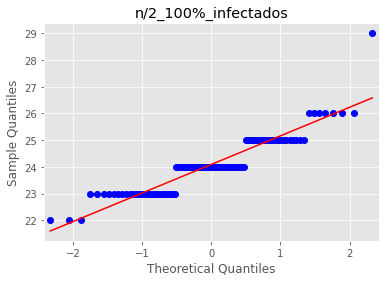

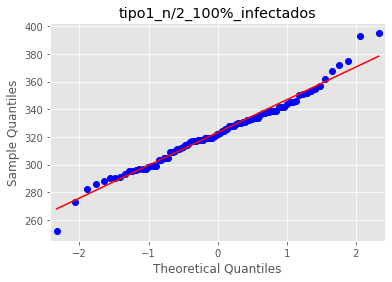

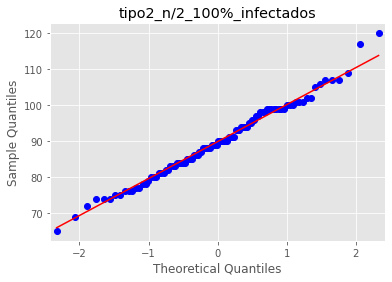

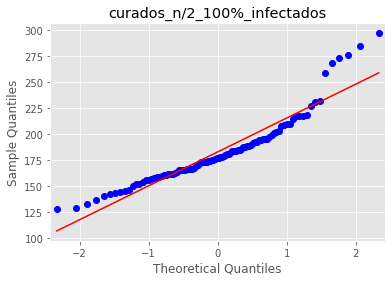

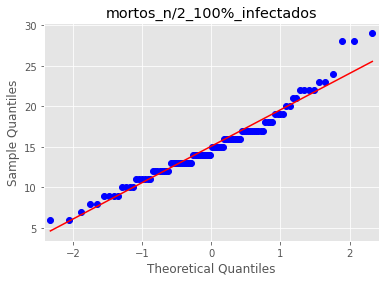

In [ ]:
#n/2 100% infectados
qq_plot(dados_simulacoes_100,colunas_100infectados)

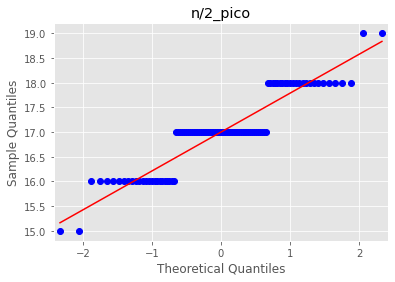

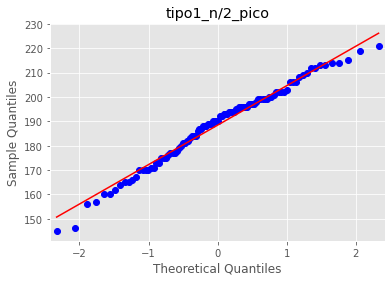

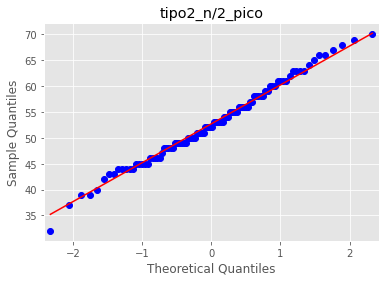

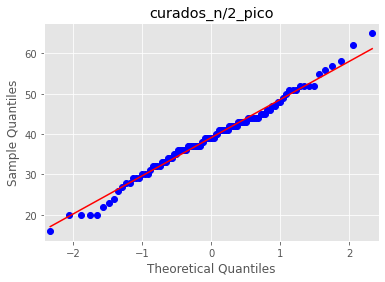

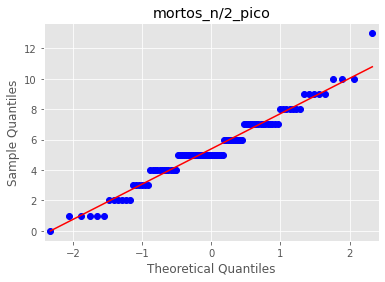

In [ ]:
#n/2 pico de infecção
qq_plot(dados_simulacoes_100,colunas_pico)

###### "dados_amostra"


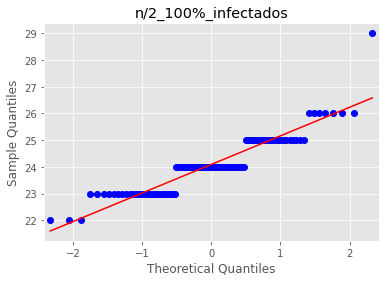

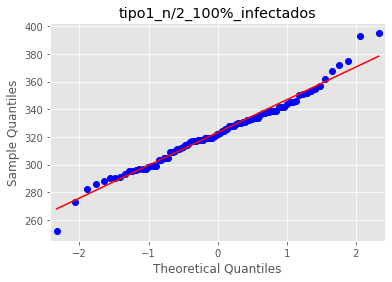

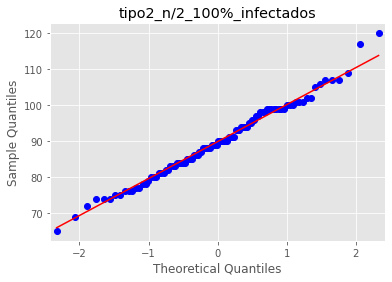

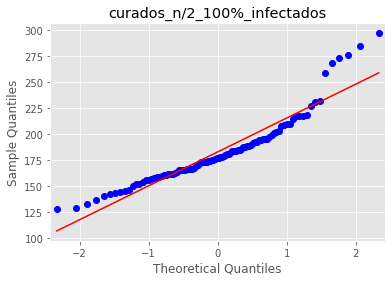

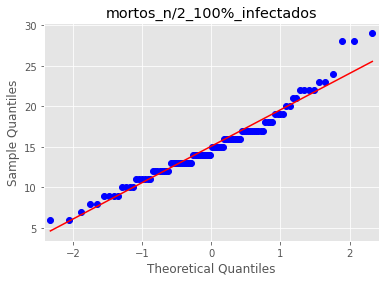

In [ ]:
#n/2 100% infectados
qq_plot(dados_simulacoes,colunas_100infectados)

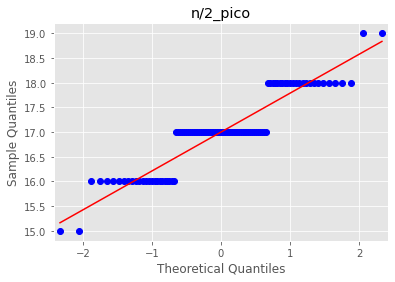

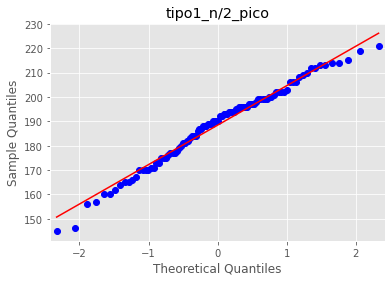

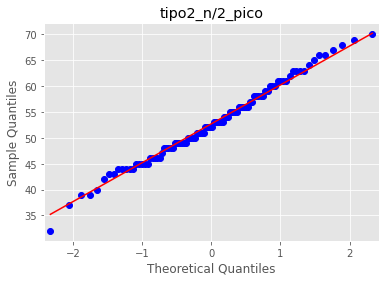

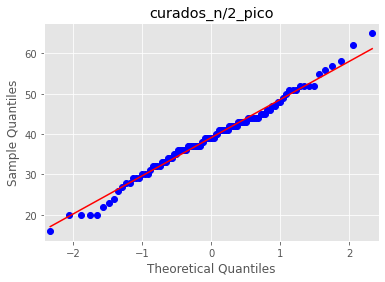

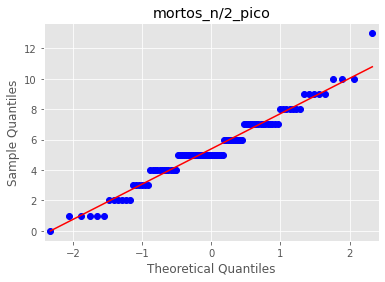

In [ ]:
#n/2 pico de infecção
qq_plot(dados_simulacoes,colunas_pico)

##### Teste de Shapiro-wilk

O teste de Shapiro-Wilk é um teste de normalidade não paramétrico. Foi publicado em 1965 por Samuel Sanford Shapiro e Martin Wilk. O objetivo deste teste é fornecer uma estatística de teste para avaliar se uma amostra tem distribuição Normal. O teste pode ser utilizado para amostras de qualquer tamanho (recomenda-se até 5.000 amostras).



In [ ]:
#@title Shapiro-Wilk para 100% de chance de infecção

from scipy import stats

percentual_amostras = 13 #@param {type:"slider", min:0, max:100, step:1}

colunas_100infectados = ['n/2_100%_infectados',	'tipo1_n/2_100%_infectados',	'tipo2_n/2_100%_infectados',	'curados_n/2_100%_infectados','mortos_n/2_100%_infectados']
colunas_pico = ['n/2_pico',	'tipo1_n/2_pico',	'tipo2_n/2_pico',	'curados_n/2_pico','mortos_n/2_pico']


def teste_shapiro_wilk(dataframe, colunas, percentual_amostras = percentual_amostras):
	dados = dataframe[colunas].sample(frac= percentual_amostras/100.0)
	for coluna in dados.columns:
		teste = stats.shapiro(dataframe[coluna])
		print('O P-Value para',coluna,'é %.4f' % teste[1])


###### Chance de infecção de 30%


In [ ]:
#n/2 100% infectados
teste_shapiro_wilk(dados_simulacoes_30,colunas_100infectados)

O P-Value para n/2_100%_infectados é 0.0000
O P-Value para tipo1_n/2_100%_infectados é 0.2131
O P-Value para tipo2_n/2_100%_infectados é 0.6502
O P-Value para curados_n/2_100%_infectados é 0.0000
O P-Value para mortos_n/2_100%_infectados é 0.0061


In [ ]:
#n/2 pico de infecção
teste_shapiro_wilk(dados_simulacoes_30,colunas_pico)

O P-Value para n/2_pico é 0.0000
O P-Value para tipo1_n/2_pico é 0.1641
O P-Value para tipo2_n/2_pico é 0.8126
O P-Value para curados_n/2_pico é 0.7414
O P-Value para mortos_n/2_pico é 0.0303


###### Chance de infecção de 100%


In [ ]:
#n/2 100% infectados
teste_shapiro_wilk(dados_simulacoes_100,colunas_100infectados)

O P-Value para n/2_100%_infectados é 1.0000
O P-Value para tipo1_n/2_100%_infectados é 0.2712
O P-Value para tipo2_n/2_100%_infectados é 0.5194
O P-Value para curados_n/2_100%_infectados é 0.1776
O P-Value para mortos_n/2_100%_infectados é 0.2385


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
#n/2 pico de infecção
teste_shapiro_wilk(dados_simulacoes_100,colunas_pico)

O P-Value para n/2_pico é 1.0000
O P-Value para tipo1_n/2_pico é 0.6561
O P-Value para tipo2_n/2_pico é 0.8771
O P-Value para curados_n/2_pico é 0.0000
O P-Value para mortos_n/2_pico é 0.0251


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


###### "dados_amostra"


In [ ]:
#n/2 100% infectados
teste_shapiro_wilk(dados_simulacoes,colunas_100infectados)

O P-Value para n/2_100%_infectados é 0.0000
O P-Value para tipo1_n/2_100%_infectados é 0.6809
O P-Value para tipo2_n/2_100%_infectados é 0.3003
O P-Value para curados_n/2_100%_infectados é 0.0085
O P-Value para mortos_n/2_100%_infectados é 0.3476


In [ ]:
#n/2 pico de infecção
teste_shapiro_wilk(dados_simulacoes,colunas_pico)

O P-Value para n/2_pico é 0.0000
O P-Value para tipo1_n/2_pico é 0.7450
O P-Value para tipo2_n/2_pico é 0.5114
O P-Value para curados_n/2_pico é 0.9970
O P-Value para mortos_n/2_pico é 0.0529


##### Teste de Kolmogorov-Smirnov

In [ ]:
#@markdown Selecione o percentual de amostras do dataframe para os testes
from scipy import stats

percentual_amostras = 16 #@param {type:"slider", min:0, max:100, step:1}

colunas_100infectados = ['n/2_100%_infectados',	'tipo1_n/2_100%_infectados',	'tipo2_n/2_100%_infectados',	'curados_n/2_100%_infectados','mortos_n/2_100%_infectados']
colunas_pico = ['n_pico',	'tipo1_n_pico',	'tipo2_n_pico',	'curados_n_pico','mortos_n_pico']

# Kolmogorov-Smirnov test Test

def teste_kolmogorov_smirnov(dataframe, colunas, percentual_amostras = percentual_amostras):
	dados = dataframe[colunas].sample(frac= percentual_amostras/100.0)
	for coluna in dados.columns:
		teste = stats.kstest(dataframe[coluna],"norm")
		print('O P-Value para',coluna,'é %.4f' % teste[1])

###### Chance de infecção de 30%


In [ ]:
#n/2 100% infectados
teste_kolmogorov_smirnov(dados_simulacoes_30,colunas_100infectados)

O P-Value para n/2_100%_infectados é 0.0000
O P-Value para tipo1_n/2_100%_infectados é 0.0000
O P-Value para tipo2_n/2_100%_infectados é 0.0000
O P-Value para curados_n/2_100%_infectados é 0.0000
O P-Value para mortos_n/2_100%_infectados é 0.0000


In [ ]:
#n/2 pico de infecção
teste_kolmogorov_smirnov(dados_simulacoes_30,colunas_pico)

O P-Value para n_pico é 0.0000
O P-Value para tipo1_n_pico é 0.0000
O P-Value para tipo2_n_pico é 0.0000
O P-Value para curados_n_pico é 0.0000
O P-Value para mortos_n_pico é 0.0000


###### Chance de infecção de 100%


In [ ]:
#n/2 100% infectados
teste_kolmogorov_smirnov(dados_simulacoes_100,colunas_100infectados)

O P-Value para n/2_100%_infectados é 0.0000
O P-Value para tipo1_n/2_100%_infectados é 0.0000
O P-Value para tipo2_n/2_100%_infectados é 0.0000
O P-Value para curados_n/2_100%_infectados é 0.0000
O P-Value para mortos_n/2_100%_infectados é 0.0000


In [ ]:
#n/2 pico de infecção
teste_kolmogorov_smirnov(dados_simulacoes_100,colunas_pico)

O P-Value para n_pico é 0.0000
O P-Value para tipo1_n_pico é 0.0000
O P-Value para tipo2_n_pico é 0.0000
O P-Value para curados_n_pico é 0.0000
O P-Value para mortos_n_pico é 0.0000


###### "dados_amostra"


In [ ]:
#n/2 100% infectados
teste_kolmogorov_smirnov(dados_simulacoes,colunas_100infectados)

O P-Value para n/2_100%_infectados é 0.0000
O P-Value para tipo1_n/2_100%_infectados é 0.0000
O P-Value para tipo2_n/2_100%_infectados é 0.0000
O P-Value para curados_n/2_100%_infectados é 0.0000
O P-Value para mortos_n/2_100%_infectados é 0.0000


In [ ]:
#n/2 pico de infecção
teste_kolmogorov_smirnov(dados_simulacoes,colunas_pico)

O P-Value para n_pico é 0.0000
O P-Value para tipo1_n_pico é 0.0000
O P-Value para tipo2_n_pico é 0.0000
O P-Value para curados_n_pico é 0.0000
O P-Value para mortos_n_pico é 0.0000



#### 9.3 Verifique  com quantos passos sua rede atinge 100% de infectados


##### Chance de infeção: 30%

In [ ]:
dados_simulacoes_30[['n_pico']].head()

,n_pico
0,34
1,35
2,35
3,32
4,35


In [ ]:
#@title A rede atinge o pico de infecção, com chance de infecção de 30%, com uma média de:
# print('A rede atinge 100% de infectados com 30% de chance de infecção com uma média de', dados_simulacoes_30['n_atualizacoes_100%_infectados'].mean(), 'passos')
print(dados_simulacoes_30['n_pico'].mean(), 'passos')

34.49 passos


In [ ]:
dados_simulacoes_30[['n_100%_infectados']].head()

,n_100%_infectados
0,49
1,47
2,49
3,46
4,50


In [ ]:
#@title A rede atinge 100% de infectados, com chance de infecção de 30%, com uma média de:
# print('A rede atinge 100% de infectados com 30% de chance de infecção com uma média de', dados_simulacoes_30['n_atualizacoes_100%_infectados'].mean(), 'passos')
print(dados_simulacoes_30['n_100%_infectados'].mean(), 'passos')

48.68 passos


##### Chance de infeção: 100%

In [ ]:
dados_simulacoes_100[['n_pico']].head()

,n_pico
0,24
1,24
2,24
3,25
4,24


In [ ]:
#@title A rede atinge o pico de infecção, com chance de infecção de 100%, com uma média de:
# print('A rede atinge 100% de infectados com 30% de chance de infecção com uma média de', dados_simulacoes_30['n_atualizacoes_100%_infectados'].mean(), 'passos')
print(dados_simulacoes_100['n_pico'].mean(), 'passos')

24.36 passos


In [ ]:
dados_simulacoes_100[['n_100%_infectados']].head()

,n_100%_infectados
0,40
1,40
2,40
3,40
4,40


In [ ]:
#@title A rede atinge 100% de infectados, com chance de infecção de 100%, com uma média de:
# print('A rede atinge 100% de infectados com 30% de chance de infecção com uma média de', dados_simulacoes_30['n_atualizacoes_100%_infectados'].mean(), 'passos')
print(dados_simulacoes_100['n_100%_infectados'].mean(), 'passos')

40.0 passos


##### "Dados_simulações"

In [ ]:
dados_simulacoes[['n_pico']].head()

,n_pico
0,34
1,34
2,34
3,34
4,34


In [ ]:
#@title Na simulação customizada ("dados_simulacoes") a rede atinge o pico de infecção com uma média de:
# print('A rede atinge 100% de infectados com 30% de chance de infecção com uma média de', dados_simulacoes_30['n_atualizacoes_100%_infectados'].mean(), 'passos')
print(dados_simulacoes['n_pico'].mean(), 'passos')

34.52857142857143 passos


In [ ]:
dados_simulacoes[['n_100%_infectados']].head()

,n_100%_infectados
0,49
1,45
2,47
3,47
4,48


In [ ]:
#@title Na simulação customizada ("dados_simulacoes") a rede atinge 100% de infectados com uma média de:
# print('A rede atinge 100% de infectados com 30% de chance de infecção com uma média de', dados_simulacoes_30['n_atualizacoes_100%_infectados'].mean(), 'passos')
print(dados_simulacoes['n_100%_infectados'].mean(), 'passos')

48.24285714285714 passos


##### 9.3.1 Com base nesses dados, verifique com 95% de confiança, qual o número de cada indivíduo no passo n/2 + 1

In [ ]:
#@title parâmetros do histograma:

import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import scipy


n_bins = 15 #@param {type:"slider", min:0, max:100, step:1}
conf_interval = 0.95 #@param {type:"slider", min:0, max:1, step:0.01}



def histograma_intervalo_confianca(serie, n_bins =n_bins , conf_interval = conf_interval):
  plt.figure()
  _ = plt.hist(serie,  bins=n_bins)

  sigma= serie.std()
  mean= serie.mean()
  ci = scipy.stats.norm.interval(conf_interval, loc=mean, scale=sigma)
  print("Intervalo de confiança de ", round(conf_interval*100,2), "%: (", round(ci[0],2),", ", round(ci[1],2),")")

  # cnfidence interval left line
  one_x12, one_y12 = [ci[0],ci[0]], [0, 20]
  # cnfidence interval right line
  two_x12, two_y12 = [ci[1],ci[1]], [0, 20]

  plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')




###### **Chance de infeção: 30%**

###### Pico de infecção

Tipo 1

Intervalo de confiança de  95.0 %: ( 173.65 ,  239.69 )


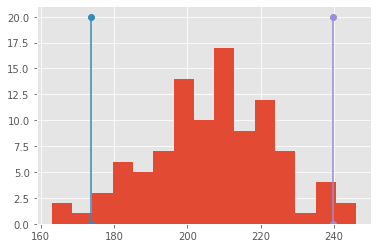

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_30["tipo1_n/2+1_pico"])

Tipo 2

Intervalo de confiança de  95.0 %: ( 43.17 ,  72.65 )


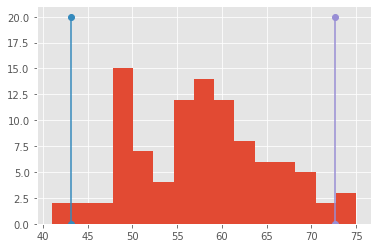

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_30["tipo2_n/2+1_pico"])

Curados


Intervalo de confiança de  95.0 %: ( 30.56 ,  74.42 )


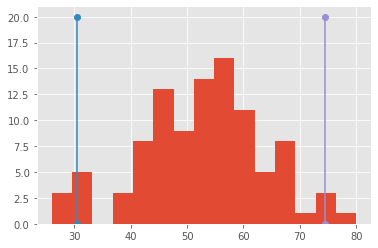

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_30["curados_n/2+1_pico"])

Mortos

Intervalo de confiança de  95.0 %: ( 1.24 ,  11.54 )


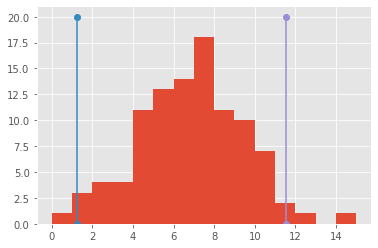

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_30["mortos_n/2+1_pico"])

###### 100% infectados

Tipo1

Intervalo de confiança de  95.0 %: ( 295.64 ,  391.18 )


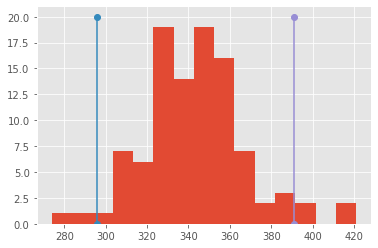

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_30["tipo1_n/2+1_100%_infectados"])

Tipo 2

Intervalo de confiança de  95.0 %: ( 75.42 ,  115.62 )


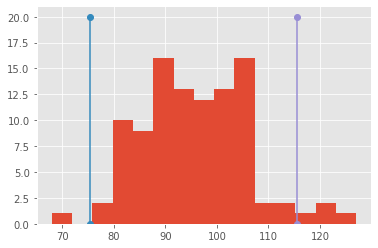

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_30["tipo2_n/2+1_100%_infectados"])

Curados


Intervalo de confiança de  95.0 %: ( 143.33 ,  280.85 )


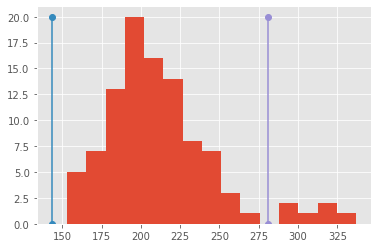

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_30["curados_n/2+1_100%_infectados"])

Mortos

Intervalo de confiança de  95.0 %: ( 7.46 ,  26.14 )


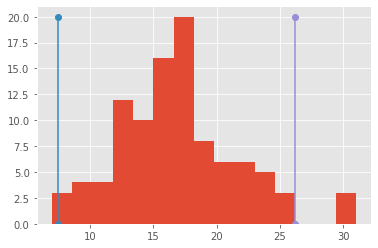

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_30["mortos_n/2+1_100%_infectados"])

###### **Chance de infeção: 100%**

###### Pico de infecção

Tipo 1

Intervalo de confiança de  95.0 %: ( 208.86 ,  242.66 )


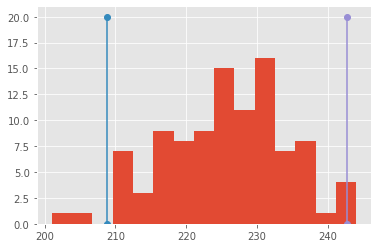

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_100["tipo1_n/2+1_pico"])

Tipo 2

Intervalo de confiança de  95.0 %: ( 90.32 ,  123.26 )


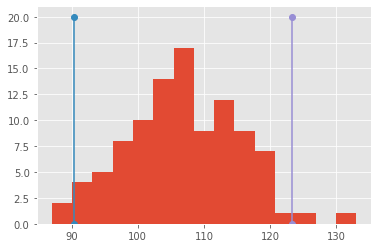

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_100["tipo2_n/2+1_pico"])

Curados


Intervalo de confiança de  95.0 %: ( 21.52 ,  25.88 )


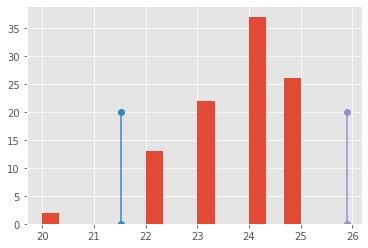

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_100["curados_n/2+1_pico"])

Mortos

Intervalo de confiança de  95.0 %: ( 3.03 ,  14.47 )


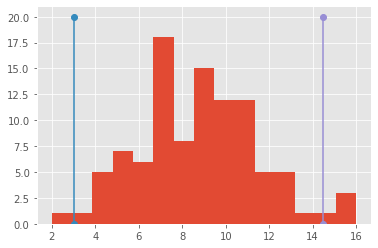

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_100["mortos_n/2+1_pico"])

###### 100% infectados

Sadios

Intervalo de confiança de  95.0 %: ( 396.83 ,  445.43 )


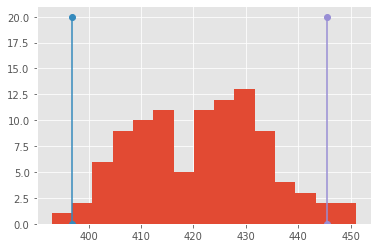

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_100["tipo1_n/2+1_100%_infectados"])

Tipo 2

Intervalo de confiança de  95.0 %: ( 186.91 ,  236.01 )


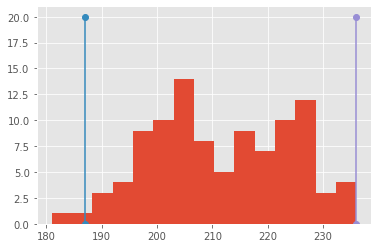

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_100["tipo2_n/2+1_100%_infectados"])

Curados


Intervalo de confiança de  95.0 %: ( 242.24 ,  256.52 )


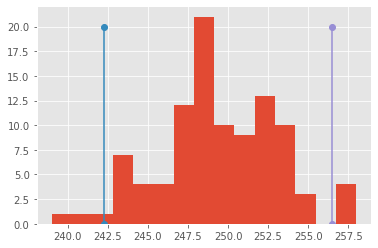

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_100["curados_n/2+1_100%_infectados"])

Mortos

Intervalo de confiança de  95.0 %: ( 23.68 ,  42.38 )


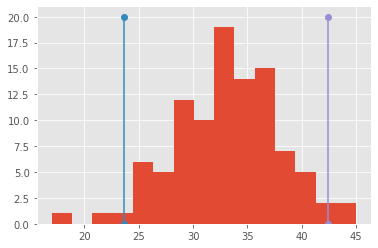

In [ ]:
histograma_intervalo_confianca(dados_simulacoes_100["mortos_n/2+1_100%_infectados"])

###### **"dados_simulacoes"**

###### Pico de infecção

Tipo 1

Intervalo de confiança de  95.0 %: ( 167.98 ,  244.11 )


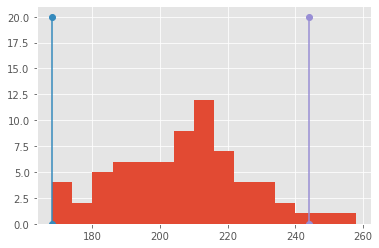

In [ ]:
histograma_intervalo_confianca(dados_simulacoes["tipo1_n/2+1_pico"])

Tipo 2

Intervalo de confiança de  95.0 %: ( 41.77 ,  72.63 )


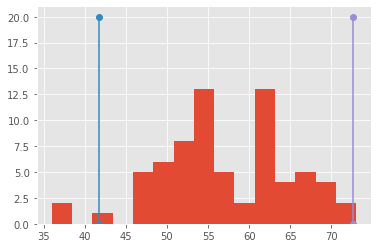

In [ ]:
histograma_intervalo_confianca(dados_simulacoes["tipo2_n/2+1_pico"])

Curados


Intervalo de confiança de  95.0 %: ( 29.48 ,  74.09 )


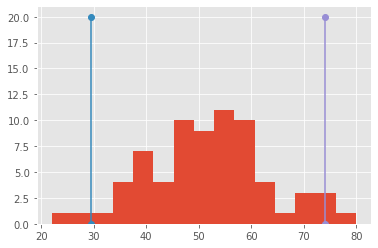

In [ ]:
histograma_intervalo_confianca(dados_simulacoes["curados_n/2+1_pico"])

Mortos

Intervalo de confiança de  95.0 %: ( 1.27 ,  12.16 )


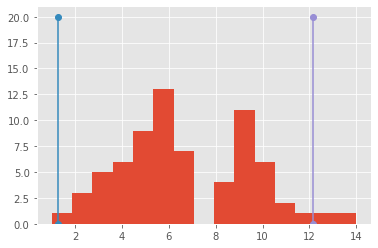

In [ ]:
histograma_intervalo_confianca(dados_simulacoes["mortos_n/2+1_pico"])

###### 100% infectados

Sadios

Intervalo de confiança de  95.0 %: ( 290.1 ,  381.62 )


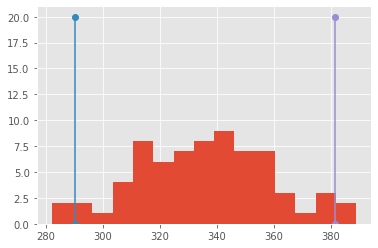

In [ ]:
histograma_intervalo_confianca(dados_simulacoes["tipo1_n/2+1_100%_infectados"])

Tipo 2

Intervalo de confiança de  95.0 %: ( 76.34 ,  113.66 )


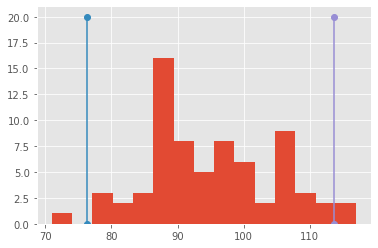

In [ ]:
histograma_intervalo_confianca(dados_simulacoes["tipo2_n/2+1_100%_infectados"])

Curados


Intervalo de confiança de  95.0 %: ( 141.95 ,  264.48 )


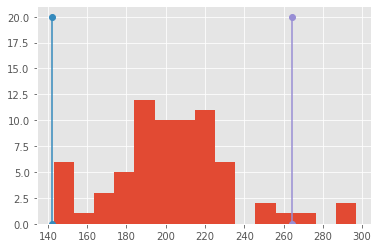

In [ ]:
histograma_intervalo_confianca(dados_simulacoes["curados_n/2+1_100%_infectados"])

Mortos

Intervalo de confiança de  95.0 %: ( 6.7 ,  25.99 )


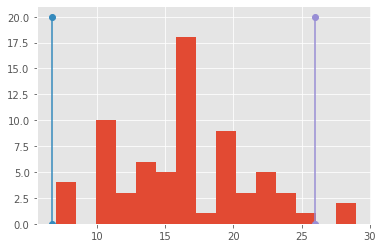

In [ ]:
histograma_intervalo_confianca(dados_simulacoes["mortos_n/2+1_100%_infectados"])

In [ ]:
import scipy.stats
import numpy as np
def intervalo_confiança_dados(X, confiança=0.95, sigma=-1):
    def S(X): #função para calcular o desvio padrão amostral
        s=0
        for i in range (0,len(X)):
            s= s + (X[i]-np.mean(X))**2
        s = np.sqrt(s/(len(X)-1))
        return s
    n = len(X) # número de elementos da amostra
    Xs = np.mean(X) # média amostral
    s = S(X) # desvio padrão amostral
    zalpha = abs(scipy.stats.norm.ppf((1 - confiança)/2.))
    if (sigma != -1): # Se a variância é conhecida
        IC1 = Xs - zalpha*sigma/np.sqrt(n)
        IC2 = Xs + zalpha*sigma/np.sqrt(n)
    else:
        if (n>= 50): # Se o tamanho da amostra é maior que 50
            # Usa-se a distribuição normal
            IC1 = Xs - zalpha*s/np.sqrt(n)
            IC2 = Xs + zalpha*s/np.sqrt(n)
        else: # Se o tamanho da amostra é maior que 50
             # Usa-se a distribuição t de student
            talpha=abs(scipy.stats.t.ppf((1 - confiança)/2.,n-1))
            IC1 = Xs - talpha*s/np.sqrt(n)
            IC2 = Xs + talpha*s/np.sqrt(n)
    return(IC1,IC2)

##### 9.3.2 Testes chi-quadrado

In [ ]:
#@title Parâmetros do teste chi quadrado

from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import numpy as np
alpha = 0.05 #@param {type:"slider", min:0, max:1, step:0.01}
freq_t1 = 0.8 #@param {type:"slider", min:0, max:1, step:0.01}
freq_t2 = 0.18 #@param {type:"slider", min:0, max:1, step:0.01}
freq_mortos = 0.02 #@param {type:"slider", min:0, max:1, step:0.01}

def chi_square_por_linha(dataframe, coluna, f_exp = [freq_t2, freq_t1, freq_mortos], alpha = alpha ):
  
  cont=0
  
  for i in range(dataframe.shape[0]):
    data = [dataframe['tipo2_'+ coluna].astype(np.float)[i], dataframe['tipo1_'+ coluna].astype(np.float)[i], dataframe['mortos_'+ coluna].astype(np.float)[i]]
    
    soma = np.sum(data)
    
    resultado=chisquare(data, f_exp = [i*soma for i in f_exp])
    #print(data)
    #print([i*soma for i in f_exp])
    #print(resultado)
    if resultado[1] < alpha:
      cont=cont+1
  print('O percentual de rejeições é de ', cont/dataframe.shape[0]*100,"%")

def chi_square_colunas(dataframe, coluna, f_exp = [freq_t2, freq_t1, freq_mortos], alpha = alpha ):
  
  cont=0
  
  
  data = [dataframe['tipo2_'+ coluna].astype(np.float).mean(), dataframe['tipo1_'+ coluna].astype(np.float).mean(), dataframe['mortos_'+ coluna].astype(np.float).mean()]
  #print(data)
  #print( [i*np.sum(data) for i in f_exp])
  resultado=chisquare(data, f_exp = [i*np.sum(data) for i in f_exp])
   
  print(resultado)


##### Chance de infecção de 30%


###### Pico de infecção

In [ ]:
chi_square_por_linha(dados_simulacoes_30, 'n/2+1_pico')

O percentual de rejeições é de  27.0 %


In [ ]:
chi_square_colunas(dados_simulacoes_30, 'n/2+1_pico')

Power_divergenceResult(statistic=2.3560140011399393, pvalue=0.3078917556203977)


###### 100% infectados

In [ ]:
chi_square_por_linha(dados_simulacoes_30, 'n/2+1_100%_infectados')

O percentual de rejeições é de  75.0 %


In [ ]:
chi_square_colunas(dados_simulacoes_30, 'n/2+1_100%_infectados')

Power_divergenceResult(statistic=9.927988556820925, pvalue=0.006984972114976967)


##### Chance de infecção de 100%


###### Pico de infecção

In [ ]:
chi_square_por_linha(dados_simulacoes_100, 'n/2+1_pico')

O percentual de rejeições é de  100.0 %


In [ ]:
chi_square_colunas(dados_simulacoes_100, 'n/2+1_pico')

Power_divergenceResult(statistic=42.21517986782566, pvalue=6.809107103190302e-10)


###### 100% infectados

In [ ]:
chi_square_por_linha(dados_simulacoes_100, 'n/2+1_100%_infectados')

O percentual de rejeições é de  100.0 %


In [ ]:
chi_square_colunas(dados_simulacoes_100, 'n/2+1_100%_infectados')

Power_divergenceResult(statistic=122.6009819625145, pvalue=2.3852561752584523e-27)


##### "Dados_simulacoes"

###### Pico de infecção

In [ ]:
chi_square_por_linha(dados_simulacoes, 'n/2+1_pico')

O percentual de rejeições é de  30.0 %


In [ ]:
chi_square_colunas(dados_simulacoes, 'n/2+1_pico')

Power_divergenceResult(statistic=2.3010514182565305, pvalue=0.3164703542858457)


###### 100% infectados

In [ ]:
chi_square_por_linha(dados_simulacoes, 'n/2+1_100%_infectados')

O percentual de rejeições é de  80.0 %


In [ ]:
chi_square_colunas(dados_simulacoes, 'n/2+1_100%_infectados')

Power_divergenceResult(statistic=10.074962832479443, pvalue=0.006490073545268155)


## Conclusões

O trabalho foi implementado na linguagem Python, fazendo-se uso de pacotes estatísticos.

Foi realizada a estatística descritiva para a amostra com 30% de chance de infecção e também com 100% de chance de infecção. Trabalhou-se com 100 simulações em uma matriz de 40 por 40.

Um momento que também foi analisado foi o pico de infecção.

A seguir, verificou-se o ajuste do experimento a uma distribuição normal.

--> Os valores de média e mediana são muito próximos, sugerindo características de simetria;

--> Fez-se uso do gráfico histograma para analisar como os dados são distribuídos e chegou-se a uma ideia preliminar que algumas das colunas do dataframe sugerem sim algo parecido com uma distribuição normal;

--> No QQ-Plot, chegou-se à conclusão similar à análise dos histogramas, com algumas colunas do dataframe apresentando seus pontos bem próximos à reta;

--> No intuito de ratificar essa análise, foi utilizado o teste de Shapiro-Wilk,
com valores de P-value maiores que 0.05 para aproximadamente as mesmas colunas do dataframe que geraram resultados próximos a uma distribuição normal, isto é, não foi rejeitada a hipótese nula de que o experimento segue uma distribuição normal.

--> No entanto, o P-value, no teste de Kolgomorov, não apresentou valores maiores que 0.05, provavelmente por causa do tamanho da amostra.

--> Verificou-se, com 95% de confiança,  o número de cada indivíduo no passo   n/2 + 1, sendo apresentado o histograma e os limites do intervalo de confiança.

--> Foi verificada a independência das contaminações entre assintomáticos e sintomáticos, por meio do Teste Qui-Square, sendo esperado 18% de doentes, 80% de assintomáticos e 2% de mortos. Duas estratégias foram implementadas. Na primeira, calculou-se o P-Value linha a linha do dataframe nas colunas  tipo1 (assintomático), tipo2 (sintomático) e mortos, obtendo-se uma série de valores para o P-Value e calculando-se o percentual de independência das contaminações entre assintomáticos e sintomáticos. Na segunda estratégia, optou-se pela média de cada uma das três séries, sendo dessa forma encontrado apenas um valor. Um resultado encontrado, na avaliação por linha, foi que houve 27% de rejeições nas proporções apresentadas pelas amostras com 30% de chance de infecção e 75% de rejeição para as amostra com 100% de chance de infecção, sendo ambos os resultados do passo n/2 + 1.



